In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Change parameters here
n_probes = 7
c_fixed_gear = 75
c_moving_gear = 46
r_probe_frac = 0.64

In [2]:
def h_tooth(x, c, amplitude=0.25):
    return amplitude * np.cos(2.*np.pi*x)

def gear_radius(c):
    return c / (2.*np.pi)

def gear_coordinates(c, amplitude=10, origin=(0.,0.), phase=0., num=1001):
    theta = np.linspace(0., 2.*np.pi, num=num)
    r_0 = gear_radius(c)
    r = r_0 + h_tooth(r_0*theta, c, amplitude=amplitude)
    x = r * np.cos(theta + phase)
    y = r * np.sin(theta + phase)
    return origin[0] + x, origin[1] + y

In [3]:
def get_probe_locs(theta, r_probe_frac, c_fixed_gear, c_moving_gear, phase=0.):
    r_fixed_gear = gear_radius(c_fixed_gear)
    r_moving_gear = gear_radius(c_moving_gear)
    origin_mg = r_fixed_gear - r_moving_gear
    
    origin_moving_gear = (origin_mg * np.cos(theta), origin_mg * np.sin(theta))
    phi = - theta * (r_fixed_gear / r_moving_gear - 1.)

    r_probe = r_probe_frac * r_moving_gear
    x_probe = origin_moving_gear[0] + r_probe * np.cos(phi + phase)
    y_probe = origin_moving_gear[1] + r_probe * np.sin(phi + phase)
    
    return x_probe, y_probe

def update(i):
    ax.clear()
    
    i_scaled = i*10
    
    r_fixed_gear = gear_radius(c_fixed_gear)
    r_moving_gear = gear_radius(c_moving_gear)
    origin_mg = r_fixed_gear - r_moving_gear
    origin_moving_gear = (origin_mg * np.cos(theta[i_scaled]), origin_mg * np.sin(theta[i_scaled]))
    phi = - theta[i_scaled] * (r_fixed_gear / r_moving_gear - 1.)
    x_moving_gear, y_moving_gear = gear_coordinates(c_moving_gear, amplitude=0.25, origin=origin_moving_gear, phase=phi)
    
    ax.plot(0. , 0., 'ob',)
    ax.plot(x_fixed_gear, y_fixed_gear, 'b')

    ax.plot(origin_moving_gear[0] , origin_moving_gear[1], 'or',)
    ax.plot(x_moving_gear, y_moving_gear, 'r')

    ax.plot([0., origin_moving_gear[0]], [0., origin_moving_gear[1]], 'k')
    
    for p in range(n_probes):
        color = plt.cm.viridis(float(p)/n_probes)
        x_probe, y_probe = x_probes[p], y_probes[p]
        ax.plot(x_probe[i_scaled] , y_probe[i_scaled], 'o', color=color)
        ax.plot([origin_moving_gear[0], x_probe[i_scaled]], [origin_moving_gear[1], y_probe[i_scaled]], color=color)
        ax.plot(x_probe[:i_scaled], y_probe[:i_scaled], color=color)

    ax.set_aspect('equal', adjustable='box')
    #remove chart outlines
    [spine.set_visible(False) for spine in ax.spines.values()]
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    
def plot_spirograph(ax):
    ax.clear()
    
    r_fixed_gear = gear_radius(c_fixed_gear)
    r_moving_gear = gear_radius(c_moving_gear)
    origin_mg = r_fixed_gear - r_moving_gear
    origin_moving_gear = (origin_mg * np.cos(theta[0]), origin_mg * np.sin(theta[0]))
    phi = - theta[0] * (r_fixed_gear / r_moving_gear - 1.)
    x_moving_gear, y_moving_gear = gear_coordinates(c_moving_gear, amplitude=0.25, origin=origin_moving_gear, phase=phi)
    
    for p in range(n_probes):
        # color = probe_colors[p % len(probe_colors)]
        color = plt.cm.viridis(float(p)/n_probes)
        x_probe, y_probe = x_probes[p], y_probes[p]
        ax.plot(x_probe, y_probe, color=color)
        
    # ax.plot(0. , 0., 'ob',)
    ax.plot(x_fixed_gear, y_fixed_gear, 'b')

    ax.plot(origin_moving_gear[0] , origin_moving_gear[1], 'or',)
    ax.plot(x_moving_gear, y_moving_gear, 'r')
        
    for p in range(n_probes):
        color = plt.cm.viridis(float(p)/n_probes)
        x_probe, y_probe = x_probes[p], y_probes[p]
        ax.plot(x_probe[0] , y_probe[0], 'o', color=color)
        ax.plot([origin_moving_gear[0], x_probe[0]], [origin_moving_gear[1], y_probe[0]], color=color)

    ax.set_aspect('equal', adjustable='box')
    
    #remove chart outlines
    [spine.set_visible(False) for spine in ax.spines.values()]
    ax.set_xticks([]) 
    ax.set_yticks([]) 

In [4]:
x_fixed_gear, y_fixed_gear = gear_coordinates(c_fixed_gear, amplitude=0.25)
n_rotations = c_moving_gear
theta = np.linspace(0.,n_rotations*2.*np.pi,num=n_rotations*101)[:-1]
r_phases = np.linspace(0.,2.*np.pi,num=n_probes+1)[:-1]
x_probes, y_probes = [], []
for i in range(r_phases.shape[0]):
    x_probe, y_probe = get_probe_locs(theta, r_probe_frac, c_fixed_gear, c_moving_gear, phase=r_phases[i])
    x_probes.append(x_probe)
    y_probes.append(y_probe)

In [5]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(6,6))
anime = FuncAnimation(
    fig = fig,
    func = update,
    frames = theta.shape[0]//10,
    interval = 1
)

anime.save('spirograph.gif', fps=60)
plt.close()

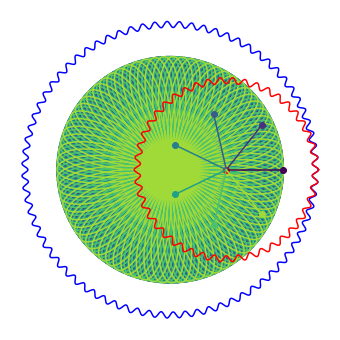

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
plot_spirograph(ax)
fig.savefig('spirograph.png')

![animation](spirograph.gif "spirograph")